| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Aprendizaje_Profundo_(Deep%20Learning).ipynb)| [⏩](./7_Desafios_Especificos_y_Avanzados.ipynb)|

# **6. Optimización y Ajuste de Modelos**

## **Técnicas de Optimización**

### **Gradiente descendente, Adam, RMSprop**

El **Gradiente Descendente** es un algoritmo de optimización utilizado para minimizar funciones de pérdida en problemas de aprendizaje automático. Su objetivo es encontrar los valores de los parámetros que minimizan la función de pérdida ajustando iterativamente los parámetros en la dirección opuesta al gradiente de la función de pérdida con respecto a los parámetros.

**Gradiente Descendente Estocástico (SGD):**

Fórmula de actualización de parámetros para el Gradiente Descendente Estocástico:

$\theta_{i+1} = \theta_i - \alpha \cdot \nabla J(\theta_i)$

- $( \theta_i )$: Parámetros en la iteración $(i)$.
- $( \alpha )$: Tasa de aprendizaje.
- $( \nabla J(\theta_i) )$: Gradiente de la función de pérdida $(J)$ con respecto a los parámetros $(\theta_i)$.

**Adam (Adaptive Moment Estimation):**

Adam combina las ideas del gradiente descendente y el método de momentos. Introduce dos conceptos principales: **momento** y **tasa de aprendizaje adaptativa**.

Fórmulas de actualización para Adam:

$m_{t+1} = \beta_1 \cdot m_t + (1 - \beta_1) \cdot g_t$

$v_{t+1} = \beta_2 \cdot v_t + (1 - \beta_2) \cdot g_t^2$

$\hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}}$

$\hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}$

$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v}_{t+1}} + \epsilon} \cdot \hat{m}_{t+1}$

- $(m_t)$, $(v_t)$: Momento y segundo momento del gradiente.
- $(\beta_1)$, $(\beta_2)$: Hiperparámetros de decaimiento del momento.
- $(g_t)$: Gradiente en el paso $(t)$.
- $(\epsilon)$: Término pequeño para evitar división por cero.

**RMSprop (Root Mean Square Propagation):**

RMSprop también ajusta la tasa de aprendizaje adaptativamente.

Fórmulas de actualización para RMSprop:

$v_{t+1} = \beta \cdot v_t + (1 - \beta) \cdot g_t^2$

$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{v_{t+1}} + \epsilon} \cdot g_t$

- $(v_t)$: Acumulación de los cuadrados del gradiente.

**Ejemplo en Código Python:**

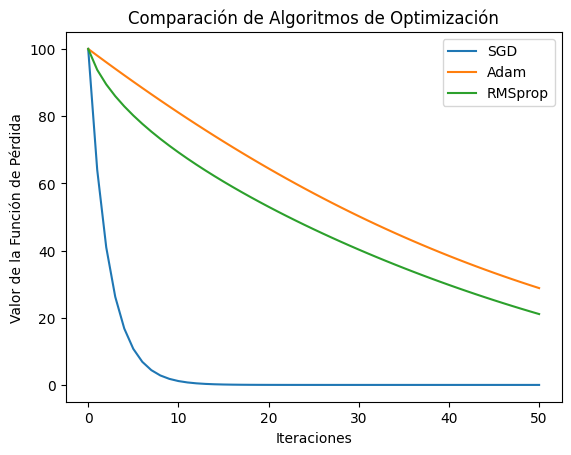

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida cuadrática
def loss_function(x):
    return x**2

# Gradiente de la función de pérdida cuadrática
def gradient(x):
    return 2 * x

# Gradiente Descendente Estocástico (SGD)
def sgd(learning_rate, iterations):
    x = 10  # Valor inicial
    trajectory = [x]
    for _ in range(iterations):
        x = x - learning_rate * gradient(x)
        trajectory.append(x)
    return np.array(trajectory)

# Adam
def adam(learning_rate, beta1, beta2, epsilon, iterations):
    x = 10
    m, v = 0, 0
    trajectory = [x]
    for t in range(1, iterations + 1):
        g = gradient(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat
        trajectory.append(x)
    return np.array(trajectory)

# RMSprop
def rmsprop(learning_rate, beta, epsilon, iterations):
    x = 10
    v = 0
    trajectory = [x]
    for _ in range(iterations):
        g = gradient(x)
        v = beta * v + (1 - beta) * g**2
        x = x - (learning_rate / (np.sqrt(v) + epsilon)) * g
        trajectory.append(x)
    return np.array(trajectory)

# Parámetros
learning_rate = 0.1
beta1, beta2 = 0.9, 0.999
epsilon = 1e-8
iterations = 50

# Obtener trayectorias
trajectory_sgd = sgd(learning_rate, iterations)
trajectory_adam = adam(learning_rate, beta1, beta2, epsilon, iterations)
trajectory_rmsprop = rmsprop(learning_rate, beta1, epsilon, iterations)

# Graficar trayectorias
plt.plot(loss_function(trajectory_sgd), label='SGD')
plt.plot(loss_function(trajectory_adam), label='Adam')
plt.plot(loss_function(trajectory_rmsprop), label='RMSprop')
plt.title('Comparación de Algoritmos de Optimización')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la Función de Pérdida')
plt.legend()
plt.show()

Este código implementa el Gradiente Descendente Estocástico (SGD), Adam y RMSprop en una función de pérdida cuadrática simple y grafica sus trayectorias. Ajusta los parámetros según sea necesario para tus necesidades específicas.

## **Ajuste de Hiperparámetros**

### **Grid search, random search, optimización bayesiana**

El ajuste de hiperparámetros es crucial para optimizar el rendimiento de los modelos de aprendizaje automático. Aquí, describiremos tres enfoques comunes: **Grid Search**, **Random Search** y **Optimización Bayesiana**.

**1. Grid Search:**

**Grid Search** es un método exhaustivo que busca a través de todas las combinaciones posibles de un conjunto predefinido de hiperparámetros.

**Ejemplo en Código Python:**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Cargar datos de iris
iris = load_iris()
X, y = iris.data, iris.target

# Definir el modelo y los hiperparámetros
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


**2. Random Search:**

**Random Search** selecciona aleatoriamente combinaciones de hiperparámetros para la evaluación, lo que puede ser más eficiente que Grid Search en algunos casos.

**Ejemplo en Código Python:**

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el rango de hiperparámetros
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (Random): {best_params_random}")

Mejores hiperparámetros (Random): {'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 53}


**3. Optimización Bayesiana:**

La **Optimización Bayesiana** utiliza modelos probabilísticos para aprender la función objetivo y decide qué conjunto de hiperparámetros explorar a continuación.

**Ejemplo en Código Python:**

In [5]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': Integer(10, 100),
    'max_depth': Categorical([None, 10, 20]),
    'min_samples_split': Integer(2, 10),
}

# Configurar BayesSearchCV
bayes_search = BayesSearchCV(model, search_spaces=param_space, n_iter=10, cv=5)
bayes_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_bayes = bayes_search.best_params_
print(f"Mejores hiperparámetros (Bayes): {best_params_bayes}")

Mejores hiperparámetros (Bayes): OrderedDict([('max_depth', 20), ('min_samples_split', 7), ('n_estimators', 22)])


**Conclusión:**

- **Grid Search** explora exhaustivamente todas las combinaciones.
- **Random Search** selecciona combinaciones aleatorias.
- **Optimización Bayesiana** utiliza modelos probabilísticos para guiar la búsqueda.

Cada enfoque tiene sus ventajas y desventajas, y la elección depende del problema específico y los recursos disponibles. La optimización bayesiana a menudo es eficiente, pero también puede ser más complicada de implementar.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Aprendizaje_Profundo_(Deep%20Learning).ipynb)| [⏩](./7_Desafios_Especificos_y_Avanzados.ipynb)|